In [1]:
%matplotlib inline

In [2]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

/tmp/ipykernel_3219015/2441880800.py:2: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [4]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os
from scipy.sparse import csr_matrix

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [5]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/driver_features"

In [6]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/OT_encodrine_analysis/TemporalProblem.pkl")

In [7]:
tp0.adata.X = tp0.adata.layers["raw_counts"].copy()

In [8]:
sc.pp.normalize_total(tp0.adata)
sc.pp.log1p(tp0.adata)

# Neurod2 

In [9]:
neurod2_expr = sc.get.obs_df(tp0.adata, keys=["Neurod2"]).values

In [17]:
adata_14 = tp0.adata[tp0.adata.obs["time"]==14.5]
adata_15 = tp0.adata[tp0.adata.obs["time"]==15.5]
neurod2_14 = sc.get.obs_df(adata_14, keys=["Neurod2"]).values
neurod2_15 = sc.get.obs_df(adata_15, keys=["Neurod2"]).values

In [19]:
tp0.push(14.5, 15.5, data=neurod2_14, key_added = "Neurod2_push_early", normalize=False)
tp0.push(15.5, 16.5, data=neurod2_15,  key_added = "Neurod2_push_late", normalize=False)
tp0.adata.obs["Neurod2_push"] = tp0.adata.obs["Neurod2_push_early"] + tp0.adata.obs["Neurod2_push_late"]

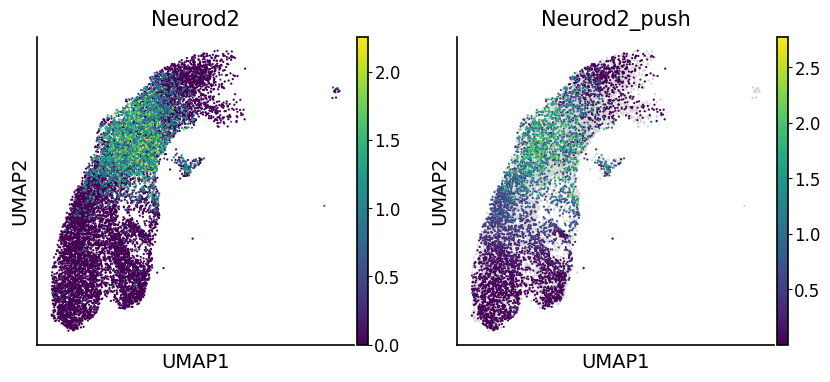

In [35]:
sc.pl.umap(tp0.adata, color=["Neurod2", "Neurod2_push"])

In [21]:
target_genes = tp0.compute_feature_correlation(obs_key="Neurod2_push", annotation={"time": [15.5, 16.5]})

In [24]:
target_genes.head(20)

,Neurod2_push_corr,Neurod2_push_pval,Neurod2_push_qval,Neurod2_push_ci_low,Neurod2_push_ci_high
Neurod2,0.915820,0.000000e+00,0.000000e+00,0.911318,0.920103
Cck,0.627498,0.000000e+00,0.000000e+00,0.610709,0.643723
Rbfox3,0.582371,0.000000e+00,0.000000e+00,0.564092,0.600078
Cacna2d1,0.548380,0.000000e+00,0.000000e+00,0.529057,0.567134
Miat,0.546725,0.000000e+00,0.000000e+00,0.527352,0.565529
Adgrb3,0.530439,0.000000e+00,0.000000e+00,0.510591,0.549722
Tbc1d9,0.494232,0.000000e+00,0.000000e+00,0.473380,0.514530
Mdk,0.484244,0.000000e+00,0.000000e+00,0.463128,0.504810
Setbp1,0.481397,0.000000e+00,0.000000e+00,0.460207,0.502039
Tox3,0.480112,2.412333e-310,4.408649e-307,0.458889,0.500788


In [29]:
target_genes = tp0.compute_feature_correlation(obs_key="Neurod2_push_early", annotation={"time": [15.5]})

In [30]:
target_genes.head(20)

,Neurod2_push_early_corr,Neurod2_push_early_pval,Neurod2_push_early_qval,Neurod2_push_early_ci_low,Neurod2_push_early_ci_high
Cacna2d1,0.683182,0.000000e+00,0.000000e+00,0.668391,0.697432
Runx1t1,0.652717,0.000000e+00,0.000000e+00,0.636811,0.668067
Ids,0.585870,0.000000e+00,0.000000e+00,0.567703,0.603466
Cck,0.570296,0.000000e+00,0.000000e+00,0.551639,0.588382
Cacna1a,0.553218,0.000000e+00,0.000000e+00,0.534040,0.571827
Vwa5b2,0.544259,0.000000e+00,0.000000e+00,0.524814,0.563137
Tox3,0.527959,0.000000e+00,0.000000e+00,0.508040,0.547314
Myt1,0.495965,0.000000e+00,0.000000e+00,0.475160,0.516216
Adgrb3,0.495042,0.000000e+00,0.000000e+00,0.474211,0.515318
Dst,0.480124,2.313300e-310,3.100285e-307,0.458901,0.500799


In [31]:
target_genes = tp0.compute_feature_correlation(obs_key="Neurod2_push_late", annotation={"time": [16.5]})

In [33]:
target_genes.head(20)

,Neurod2_push_late_corr,Neurod2_push_late_pval,Neurod2_push_late_qval,Neurod2_push_late_ci_low,Neurod2_push_late_ci_high
Cacna2d1,0.671102,1.279262e-245,2.475372e-241,0.644102,0.696431
Runx1t1,0.635751,4.951406e-210,4.790486e-206,0.606532,0.663254
Cck,0.561090,1.794314e-150,8.679995e-147,0.527612,0.592827
Ids,0.543300,9.812859e-139,3.797576e-135,0.508892,0.575974
Myt1,0.510177,6.530152e-119,1.403983e-115,0.474124,0.544522
Miat,0.507001,3.869853e-117,7.488165e-114,0.470797,0.541501
Tox3,0.505431,2.861082e-116,4.613495e-113,0.469152,0.540007
Vwa5b2,0.499305,6.270025e-113,9.332692e-110,0.462737,0.534177
Rap1gap2,0.489415,1.075860e-107,1.224581e-104,0.452388,0.524758
Sulf1,0.488475,3.305948e-107,3.553894e-104,0.451405,0.523862
